In [14]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

In [15]:
#Abrimos el fits de las estrellas
star_1b = fits.open('Star1_B.fits')[0]
star_1v = fits.open('Star1_V.fits')[0]
star_2b = fits.open('Star2_B.fits')[0]
star_2v = fits.open('Star2_V.fits')[0]
#data y header
data = star_1b.data
header = star_1b.header

header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{da52125b-74f6-49

In [16]:
#Threshold, para cada estrella
threshold_1b = detect_threshold(star_1b.data, nsigma = 5)
threshold_1v = detect_threshold(star_1v.data, nsigma = 5)
threshold_2b = detect_threshold(star_2b.data, nsigma = 5)
threshold_2v = detect_threshold(star_2v.data, nsigma = 5)
#Detectamos fuentes
sour_1b = detect_sources(star_1b.data, threshold_1b, npixels=50)
sour_1v = detect_sources(star_1v.data, threshold_1v, npixels=50)
sour_2b = detect_sources(star_2b.data, threshold_2b, npixels=50)
sour_2v = detect_sources(star_1v.data, threshold_2v, npixels=50)

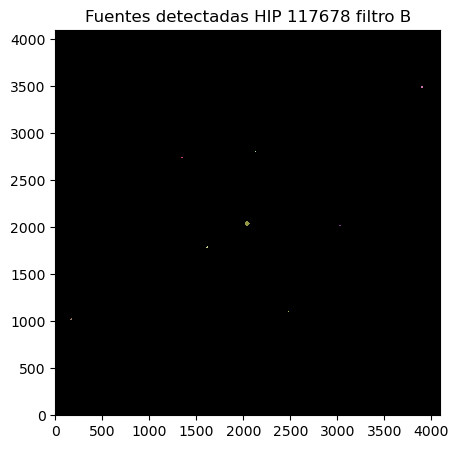

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 9
labels: [1 2 3 4 5 6 7 8 9]


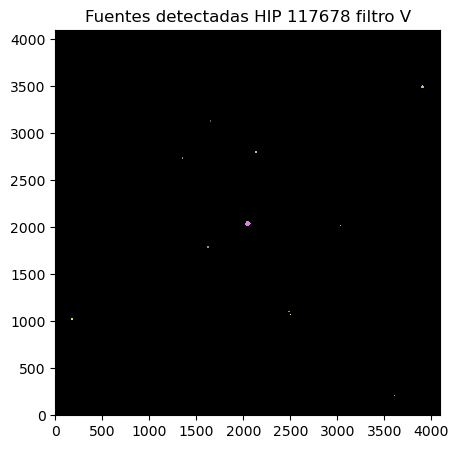

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 13
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


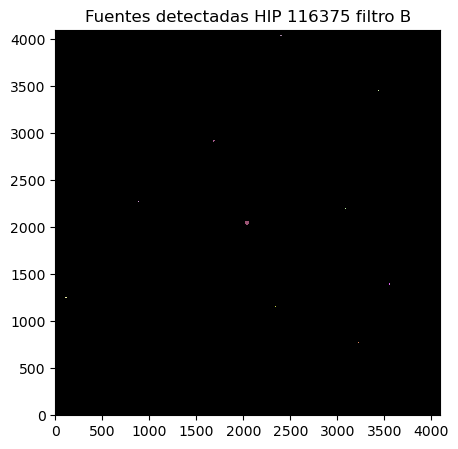

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 12
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12]


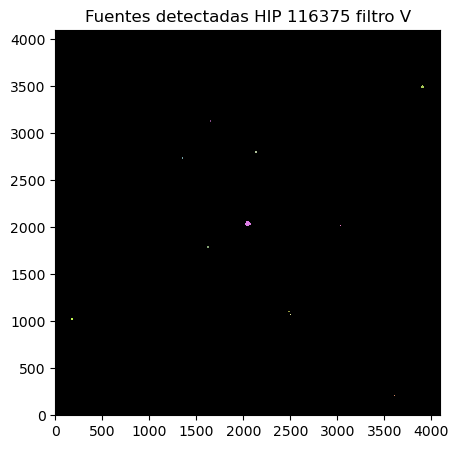

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 13
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


In [17]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sour_1b = sour_1b.make_cmap(seed=123)
cmap_sour_1v = sour_1v.make_cmap(seed=123)
cmap_sour_2b = sour_2b.make_cmap(seed=123)
cmap_sour_2v = sour_2v.make_cmap(seed=123)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_1b, origin='lower', cmap=cmap_sour_1b, interpolation='nearest')
plt.title('Fuentes detectadas HIP 117678 filtro B')
plt.show()
print(sour_1b)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_1v, origin='lower', cmap=cmap_sour_1v, interpolation='nearest')
plt.title('Fuentes detectadas HIP 117678 filtro V')
plt.show()
print(sour_1v)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_2b, origin='lower', cmap=cmap_sour_2b, interpolation='nearest')
plt.title('Fuentes detectadas HIP 116375 filtro B')
plt.show()
print(sour_2b)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_2v, origin='lower', cmap=cmap_sour_2v, interpolation='nearest')
plt.title('Fuentes detectadas HIP 116375 filtro V')
plt.show()
print(sour_2v)

In [18]:
#Obtenemos el catálogo de la primera
cat_1b = SourceCatalog(data, sour_1b)
#Lo pasamos a tabla y lo mostramos
tbl_1b = cat_1b.to_table()
tbl_1b

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,173.5152734005376,1019.5443948192337,None,162,185,1011,1027,279.0,4.74633505909452,3.0262852309482753,3.9872976596209555,0.7703637646995642,12.934003829956055,151.5459442138672,0.0,14531.495308876038,nan,15759.84636746697,nan
2,2483.294484480352,1103.7145244947985,None,2476,2491,1099,1108,79.0,3.5021588608772047,1.811059845737427,15.233074028858438,0.8559088612491084,12.818110466003418,33.245174407958984,0.0,1518.4554653167725,nan,2695.9285521540155,nan
3,1619.9680984455483,1785.1295467030661,None,1608,1631,1777,1793,266.0,4.804083150616944,2.9044857948144482,8.292772927658042,0.7965391807024449,12.86263656616211,134.6727752685547,0.0,11927.749587059021,nan,13081.783362357783,nan
4,2042.7021890639485,2035.7102898678422,None,2013,2073,2008,2061,2031.0,6.372045234125504,4.814260344574753,8.442400488177654,0.6551160397440562,12.812512397766113,10065.6494140625,0.0,1226586.5039396286,nan,1204664.2858364834,nan
5,3031.7877184832546,2013.0544772006892,None,3025,3040,2008,2017,118.0,3.8079005117944305,2.131861016166774,11.685283522059011,0.828592571909442,13.012057304382324,50.385013580322266,0.0,2883.4761123657227,nan,3881.7486190164213,nan
6,1351.3324841437934,2735.7311748280504,None,1341,1361,2729,2741,179.0,4.369654208439156,2.4023506595766304,9.115302856191258,0.8353091678159674,12.96735668182373,90.5738296508789,0.0,6474.4921798706055,nan,7468.826147607253,nan
7,2130.5029238365523,2798.1782757000224,None,2121,2140,2792,2804,175.0,4.334263338877058,2.4039377446784385,7.319736529874794,0.8320932015153665,13.032977104187012,79.30297088623047,0.0,5961.469919204712,nan,7052.761688120507,nan
8,1649.1545877357125,3127.3939196307406,None,1640,1657,3122,3132,126.0,3.9201308329523403,2.1140038921042614,6.127618085444156,0.8421337541324567,12.901400566101074,59.66704559326172,0.0,3519.4870462417603,nan,4509.523133066693,nan


In [19]:
#Catalogo de las 4
# Catálogo para HIP117678 
cat_1b = SourceCatalog(star_1b.data, sour_1b)
cat_1v = SourceCatalog(star_1v.data, sour_1v)
# Catálogo para HIP116375  
cat_2b = SourceCatalog(star_2b.data, sour_2b)
cat_2v = SourceCatalog(star_2v.data, sour_2v)

#Lo pasamos a tabla y lo mostramos
tbl_1b = cat_1b.to_table()
tbl_1v = cat_1v.to_table()
tbl_2b = cat_2b.to_table()
tbl_2v = cat_2v.to_table()

print(tbl_1b)
print(tbl_1v)
print(tbl_2b)
print(tbl_2v)

label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
----- ------------------ ------------------ ... ------------------ ------------
    1  173.5152734005376 1019.5443948192337 ...  15759.84636746697          nan
    2  2483.294484480352 1103.7145244947985 ... 2695.9285521540155          nan
    3 1619.9680984455483 1785.1295467030661 ... 13081.783362357783          nan
    4 2042.7021890639485 2035.7102898678422 ... 1204664.2858364834          nan
    5 3031.7877184832546 2013.0544772006892 ... 3881.7486190164213          nan
    6 1351.3324841437934 2735.7311748280504 ...  7468.826147607253          nan
    7 2130.5029238365523 2798.1782757000224 ...  7052.761688120507          nan
    8 1649.1545877357125 3127.3939196307406 ...  4509.523133066693          nan
    9  3905.519507003367 3489.6668040313534 ... 55271.097246212536          nan
label     xcentroid          ycentroid  

In [20]:
# Ahora extraemos las columnas
tabla_1b = tbl_1b['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla_1v = tbl_1v['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla_2b = tbl_2b['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla_2v = tbl_2v['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
print(tabla_1b)
print(tabla_1v)
print(tabla_2b)
print(tabla_2v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1  173.5152734005376 1019.5443948192337  279.0 14531.495308876038
    2  2483.294484480352 1103.7145244947985   79.0 1518.4554653167725
    3 1619.9680984455483 1785.1295467030661  266.0 11927.749587059021
    4 2042.7021890639485 2035.7102898678422 2031.0 1226586.5039396286
    5 3031.7877184832546 2013.0544772006892  118.0 2883.4761123657227
    6 1351.3324841437934 2735.7311748280504  179.0 6474.4921798706055
    7 2130.5029238365523 2798.1782757000224  175.0  5961.469919204712
    8 1649.1545877357125 3127.3939196307406  126.0 3519.4870462417603
    9  3905.519507003367 3489.6668040313534  460.0  54003.41616153717
label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- --------------

In [21]:
#obtenemos flujo real
tabla_1b['segment_flux'] = tabla_1b['segment_flux']/header['EXPTIME']
tabla_1v['segment_flux'] = tabla_1v['segment_flux']/header['EXPTIME']
tabla_2b['segment_flux'] = tabla_2b['segment_flux']/header['EXPTIME']
tabla_2v['segment_flux'] = tabla_2v['segment_flux']/header['EXPTIME']
#mostamos
print(tabla_1b)
print(tabla_1v)
print(tabla_2b)
print(tabla_2v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1  173.5152734005376 1019.5443948192337  279.0 2906.2990617752075
    2  2483.294484480352 1103.7145244947985   79.0  303.6910930633545
    3 1619.9680984455483 1785.1295467030661  266.0  2385.549917411804
    4 2042.7021890639485 2035.7102898678422 2031.0 245317.30078792572
    5 3031.7877184832546 2013.0544772006892  118.0  576.6952224731446
    6 1351.3324841437934 2735.7311748280504  179.0 1294.8984359741212
    7 2130.5029238365523 2798.1782757000224  175.0 1192.2939838409425
    8 1649.1545877357125 3127.3939196307406  126.0   703.897409248352
    9  3905.519507003367 3489.6668040313534  460.0 10800.683232307434
label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- --------------

In [37]:
#Buscamos la fuente que es la estrella (mayor área)
star_1b_index = np.argmax(tabla_1b['area'])
star_1v_index = np.argmax(tabla_1v['area'])
star_2b_index = np.argmax(tabla_2b['area'])
star_2v_index = np.argmax(tabla_2v['area'])

#Obtenemos flujo
flux_star_1b = tabla_1b['segment_flux'][star_1b_index]
flux_star_1v = tabla_1v['segment_flux'][star_1v_index]
flux_star_2b = tabla_2b['segment_flux'][star_2b_index]
flux_star_2v = tabla_2v['segment_flux'][star_2v_index]

#Magnitud media
mag_1b = -2.5 * np.log(flux_star_1b)
mag_1v = -2.5 * np.log(flux_star_1v)
mag_2b = -2.5 * np.log(flux_star_2b)
mag_2v = -2.5 * np.log(flux_star_2v)

#Zeropoint (depende del filtro y la estrella)
zp_1b =  8.290 - mag_1b
zp_1v =  7.160 - mag_1v
zp_2b =  8.453 - mag_2b
zp_2v =  7.191 - mag_2v

zp_mean_b = (zp_1b + zp_2b)/2
zp_mean_v = (zp_1v + zp_2v)/2

print(zp_mean_b,zp_mean_v)

39.264197222253934 39.648153131842456


In [38]:
#Magnitud calibrada
tabla_1b['magnitude'] = zp_mean_b - 2.5 * np.log(tabla_1b['segment_flux'])
tabla_1v['magnitude'] = zp_mean_v - 2.5 * np.log(tabla_1v['segment_flux'])
tabla_2b['magnitude'] = zp_mean_b - 2.5 * np.log(tabla_2b['segment_flux'])
tabla_2v['magnitude'] = zp_mean_v - 2.5 * np.log(tabla_2v['segment_flux'])

print(tabla_1b)
print(tabla_1v)
print(tabla_2b)
print(tabla_2v)

label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
----- ------------------ ... ------------------ ------------------
    1  173.5152734005376 ... 2906.2990617752075 19.327607845593395
    2  2483.294484480352 ...  303.6910930633545 24.974169613389574
    3 1619.9680984455483 ...  2385.549917411804  19.82123484704699
    4 2042.7021890639485 ... 245317.30078792572  8.238427830108233
    5 3031.7877184832546 ...  576.6952224731446 23.370912431410783
    6 1351.3324841437934 ... 1294.8984359741212 21.348728364156923
    7 2130.5029238365523 ... 1192.2939838409425 21.555111102363984
    8 1649.1545877357125 ...   703.897409248352  22.87261567215506
    9  3905.519507003367 ... 10800.683232307434 16.045785538848865
label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
----- ------------------ ... ------------------ --------------